In [1]:
import pandas as pd
df = pd.read_csv('C:\\Users\\akulc\\Downloads\\diabetes+130-us+hospitals+for+years+1999-2008\\diabetic_data.csv', keep_default_na=False, na_values=['?'])

C:\Users\akulc\AppData\Local\Temp\ipykernel_40516\4182345597.py:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('C:\\Users\\akulc\\Downloads\\diabetes+130-us+hospitals+for+years+1999-2008\\diabetic_data.csv', keep_default_na=False, na_values=['?'])


In [2]:
df.isnull().sum()

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [4]:
df1 = df.drop(columns=['weight', 'encounter_id', 'patient_nbr', 'diag_2', 'diag_3'])

In [5]:
df1['medical_specialty'] = df1['medical_specialty'].fillna('missing')
df1['payer_code'] = df1['payer_code'].fillna('missing')
df1['race'] = df1['race'].fillna('missing')
df1['diag_1'] = df1['diag_1'].fillna(df1['diag_1'].mode()[0])

In [6]:
df1 = df1[~df1['discharge_disposition_id'].isin([11, 13, 14, 19, 20])]

In [7]:
df1['readmitted_categorical'] = df1['readmitted'].replace({'>30': 'No', 'NO': 'No', '<30': 'Yes'})
df1['readmitted_numerical'] = df1['readmitted_categorical'].replace({'No': 0, 'Yes': 1}).astype(int)

C:\Users\akulc\AppData\Local\Temp\ipykernel_40516\4135292657.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['readmitted_numerical'] = df1['readmitted_categorical'].replace({'No': 0, 'Yes': 1}).astype(int)


In [8]:
import numpy as np
df1['readmitted_numerical'] = df1['readmitted_numerical'].astype(np.int64)

In [9]:
df1.columns

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'payer_code', 'medical_specialty', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'diag_1', 'number_diagnoses',
       'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'readmitted_categorical', 'readmitted_numerical'],
      dtype='object')

In [10]:
df1.isnull().sum()

race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose                    0
miglitol                    0
troglitazone                0
tolazamide

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99343 entries, 0 to 101765
Data columns (total 47 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   race                      99343 non-null  object
 1   gender                    99343 non-null  object
 2   age                       99343 non-null  object
 3   admission_type_id         99343 non-null  int64 
 4   discharge_disposition_id  99343 non-null  int64 
 5   admission_source_id       99343 non-null  int64 
 6   time_in_hospital          99343 non-null  int64 
 7   payer_code                99343 non-null  object
 8   medical_specialty         99343 non-null  object
 9   num_lab_procedures        99343 non-null  int64 
 10  num_procedures            99343 non-null  int64 
 11  num_medications           99343 non-null  int64 
 12  number_outpatient         99343 non-null  int64 
 13  number_emergency          99343 non-null  int64 
 14  number_inpatient          

In [17]:
import pandas as pd

df_encoded = pd.get_dummies(df1, drop_first=True)

print(df_encoded.head())

   admission_type_id  discharge_disposition_id  admission_source_id  \
0                  6                        25                    1   
1                  1                         1                    7   
2                  1                         1                    7   
3                  1                         1                    7   
4                  1                         1                    7   

   time_in_hospital  num_lab_procedures  num_procedures  num_medications  \
0                 1                  41               0                1   
1                 3                  59               0               18   
2                 2                  11               5               13   
3                 2                  44               1               16   
4                 1                  51               0                8   

   number_outpatient  number_emergency  number_inpatient  ...  \
0                  0                 0             

In [18]:
df_encoded.isnull().sum()

admission_type_id             0
discharge_disposition_id      0
admission_source_id           0
time_in_hospital              0
num_lab_procedures            0
                             ..
change_No                     0
diabetesMed_Yes               0
readmitted_>30                0
readmitted_NO                 0
readmitted_categorical_Yes    0
Length: 890, dtype: int64

In [19]:
# Combine the one-hot encoded categorical features with the numerical features
numerical_features = [
    'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 
    'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications',
    'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses'
]
X = pd.concat([df_encoded, df1[numerical_features]], axis=1)

# Display the shape of the combined dataset
print(X.shape)

(99343, 901)


In [20]:
X.isnull().sum()

admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
num_lab_procedures          0
                           ..
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
number_diagnoses            0
Length: 901, dtype: int64

In [ ]:
from sklearn.manifold import TSNE

# Initialize t-SNE
tsne = TSNE(n_components=3, random_state=42, perplexity=30, n_iter=300)

# Fit and transform the data
X_tsne = tsne.fit_transform(X)

# Display the shape of the transformed data
print(X_tsne.shape)

(99343, 3)


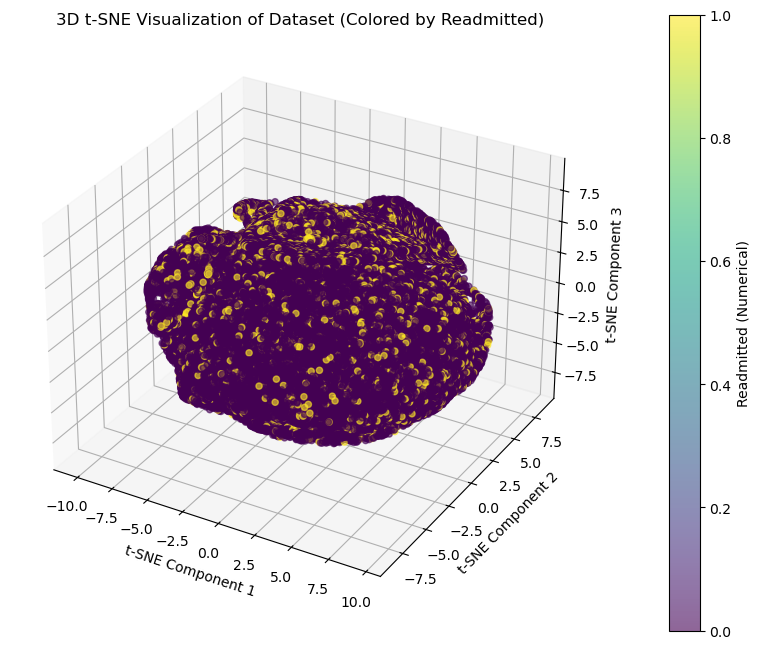

In [24]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with color based on the target variable
scatter = ax.scatter(
    X_tsne[:, 0],  # t-SNE Component 1
    X_tsne[:, 1],  # t-SNE Component 2
    X_tsne[:, 2],  # t-SNE Component 3
    c=df1['readmitted_numerical'],  # Color by target variable
    cmap='viridis',  # Color map
    alpha=0.6  # Transparency
)

# Add a color bar
cbar = plt.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label('Readmitted (Numerical)')

# Add labels and title
ax.set_xlabel('t-SNE Component 1')
ax.set_ylabel('t-SNE Component 2')
ax.set_zlabel('t-SNE Component 3')
plt.title('3D t-SNE Visualization of Dataset (Colored by Readmitted)')
plt.show()

In [25]:
tsne1 = TSNE(n_components=3, random_state=42, perplexity=5, learning_rate=300, n_iter=600)
X_tsne1 = tsne1.fit_transform(X)

# Display the shape of the transformed data
print(X_tsne1.shape)


(99343, 3)


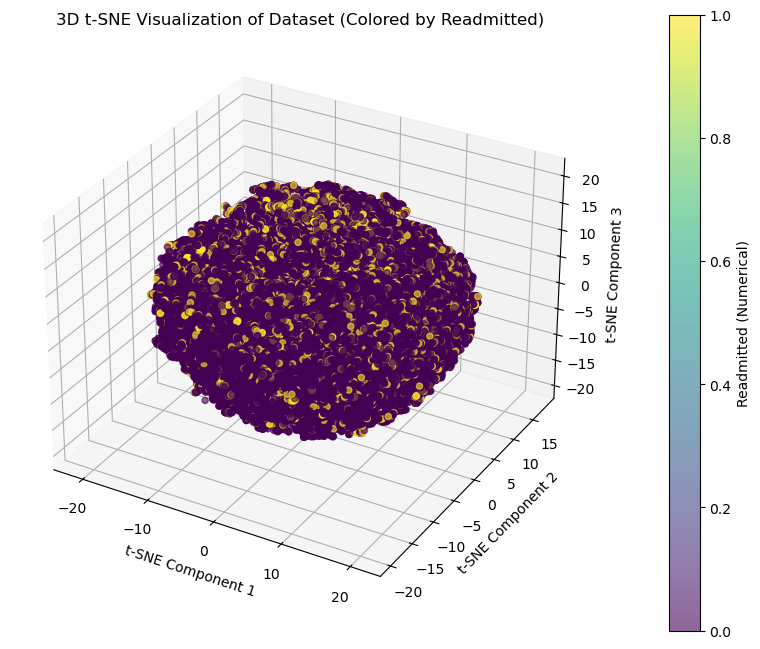

In [26]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with color based on the target variable
scatter = ax.scatter(
    X_tsne1[:, 0],  # t-SNE Component 1
    X_tsne1[:, 1],  # t-SNE Component 2
    X_tsne1[:, 2],  # t-SNE Component 3
    c=df1['readmitted_numerical'],  # Color by target variable
    cmap='viridis',  # Color map
    alpha=0.6  # Transparency
)

# Add a color bar
cbar = plt.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label('Readmitted (Numerical)')

# Add labels and title
ax.set_xlabel('t-SNE Component 1')
ax.set_ylabel('t-SNE Component 2')
ax.set_zlabel('t-SNE Component 3')
plt.title('3D t-SNE Visualization of Dataset (Colored by Readmitted)')
plt.show()